<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

# Корреляция. Визуализация корреляции в python

In [4]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Данный датасет представляет собой информацию об уровне "счастья" в странах. Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

В таблице представлены следующие переменные:
*  Country - название страны
*  Ladder - показатель насколько удовлетворены жизнью
*  SD of Ladder - среднеквадратическое отклонение показателя удовлетворенностью жизнью
*  Positive affect - показатель позитивных эмоций
*  Negative affect - показатель негативных эмоций
*  Social support - насколько социальная поддержка повлияла на уровень счастья
*  Freedom - насколько показатель степени свободы повлиял на уровень счастья
*  Corruption - насколько показатель коррупции влияет на уровень счастья
*  Generosity - насколько уровень щедрости влияет на уровень счастья
*  Log of GDP per capita - насколько Валовый Внутренний продукт влияет на уровень счастья
*  Healthy life expectancy - насколько продолжительность жизни влияет на уровень счастья


Сделаем точечный график двух выборок из таблицы "World happiness report".

Text(0, 0.5, 'уровень позитивных эмоций')

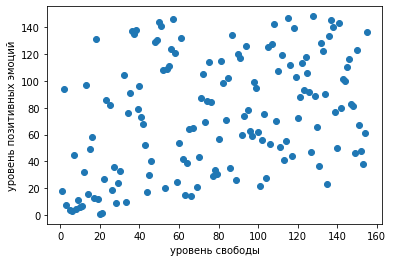

In [6]:
freedom = df['Freedom'] # уровень свободы
positive = df['Positive affect'] # показатель позитивных эмоций
corruption = df['Corruption']
#plt.scatter(freedom, positive)
plt.scatter(freedom, corruption)
plt.xlabel('уровень свободы')
plt.ylabel('уровень позитивных эмоций')

In [7]:
pearsonr(freedom, positive)
#pearsonr(corruption, freedom)

ValueError: array must not contain infs or NaNs

Почистим данные от **выбросов**

**Заполним отсутствующие значения** некой переменной (0, например) - один из методов борьбы с выбросами

.fillna() - заполнение нулевыми данными отсутствующих элементов

In [8]:
df['Freedom'].fillna(0, inplace = True)
df['Corruption'].fillna(0, inplace = True)
df['Positive affect'].fillna(0, inplace = True)

In [9]:
pearsonr(corruption, freedom)

(0.4095394616160763, 1.1039634257971864e-07)

**Ковариация** - степень разброса данных относительно друг друга.

Посчитаем ковариацию двух выборок в pandas с помощью cov():

In [10]:
df[['Freedom', 'Corruption']].cov()

,Freedom,Corruption
Freedom,2041.000000,830.445161
Corruption,830.445161,2014.593383


**Корреляция** - нормированная ковариация. Равна корреляции Пирсона. Равна также (ковариация/((стандартное отклонение первой величины) * (стандартное отклонение второй величины)))

In [11]:
1403.903226/(statistics.pstdev(freedom)*statistics.pstdev(positive))

0.6922884204643518

Коэффициент корреляции Пирсона = 0.68 или 68%. 

Команда **sns.regplot** строит прямую, по которой две выборки линейно коррелируют друг с другом

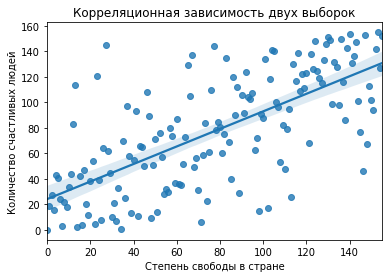

In [12]:
freedom = df['Freedom']
positive = df['Positive affect']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= freedom, y=positive, data=df, fit_reg=True)
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Корреляция **regplot** с добавлением **регрессионного анализа**. Линейная регрессия -  используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.

# Линейная регрессия

Построим модель для двух переменных Freedom и Positive affect

Библиотека sklearn в python - мощное средство для анализа данных. Позволяет строить различные модели.

Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array

In [13]:
freedom = np.array(freedom).reshape(-1,1)
positive = np.array(positive).reshape(-1,1)

Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Задача:** научиться предсказывать **значение показателя позитивных эмоций (positive affect)** в стране по параметру **уровень свободы в стране (freedom)** с помощью линейной регрессии

Разделим на 80% тренировочных и на 20% тестовых

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    freedom,
    positive,
    test_size = 0.2
)

Обучим модель с помощью **fit()** метода

In [16]:
model.fit(X_train, y_train)

LinearRegression()

Посмотрим предсказания модели на тестируемых данных

In [17]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели

In [18]:
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

630.4504816565988
21.311155752330283


model.score - подсчет среднеквадратичной ошибки

51% точности на тестовых данных

Построим график линейной регресии

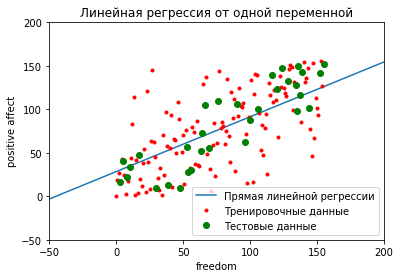

In [19]:
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

В данном случае получается зависимость двух переменных: **чем больше свободы, тем более позитивно население.**

# Примеры матрицы корреляций для 3 выборок

Загрузим датасет цветов ириса. 
В этом датасете показана проблема **классификации**.
В этом датасете всего 3 класса различных цветов. Каждый из классов отличается по 4 параметрам (features): 
1.  sepal length in cm 
2.  sepal width in cm 
3.  petal length in cm 
4.  petal width in cm 

Названия классов: 
*  Iris Setosa 
*  Iris Versicolour 
*  Iris Virginica

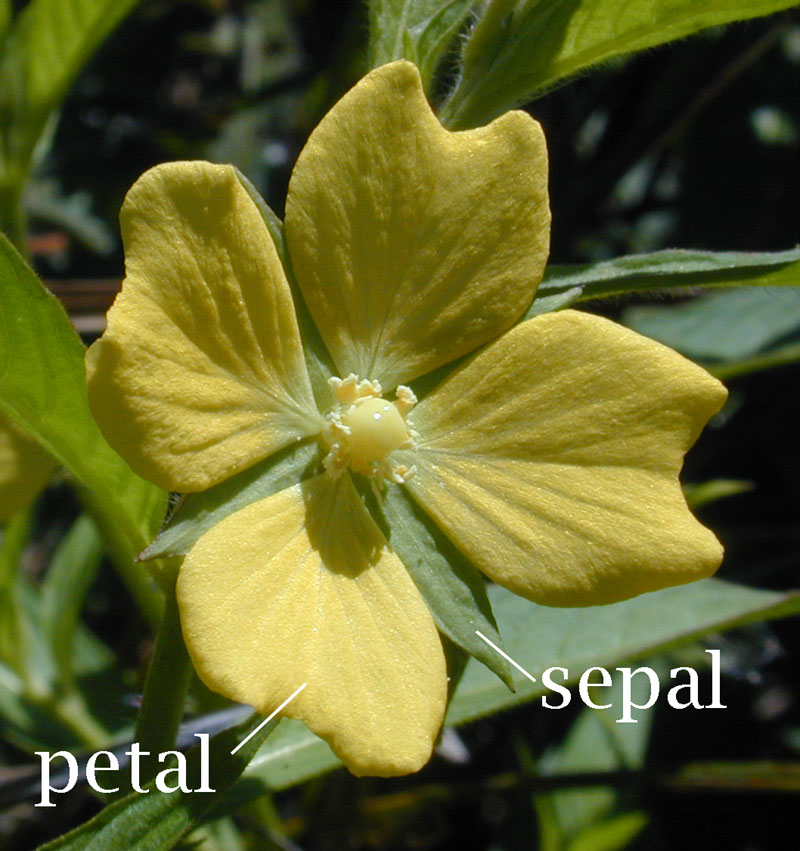

In [20]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg', width=300, height=300)

Загрузим датасет:

In [21]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Всего 3 типа цветков: setose, versicolor, virginica

In [22]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Построим попарные графики для выборок, а также частотные графики на главной диагонали  с помощью метода **pairplot**.

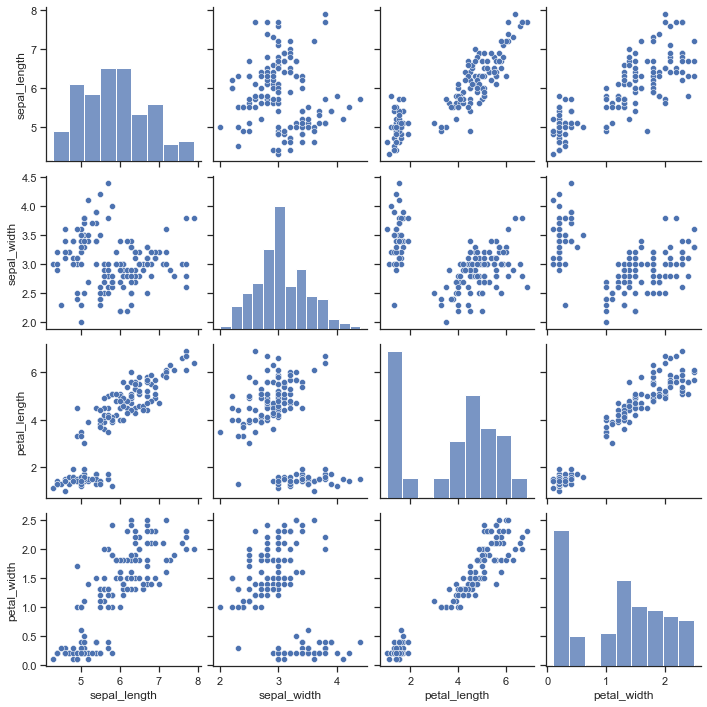

In [23]:
g = sns.pairplot(iris)

Проведем классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование классов:

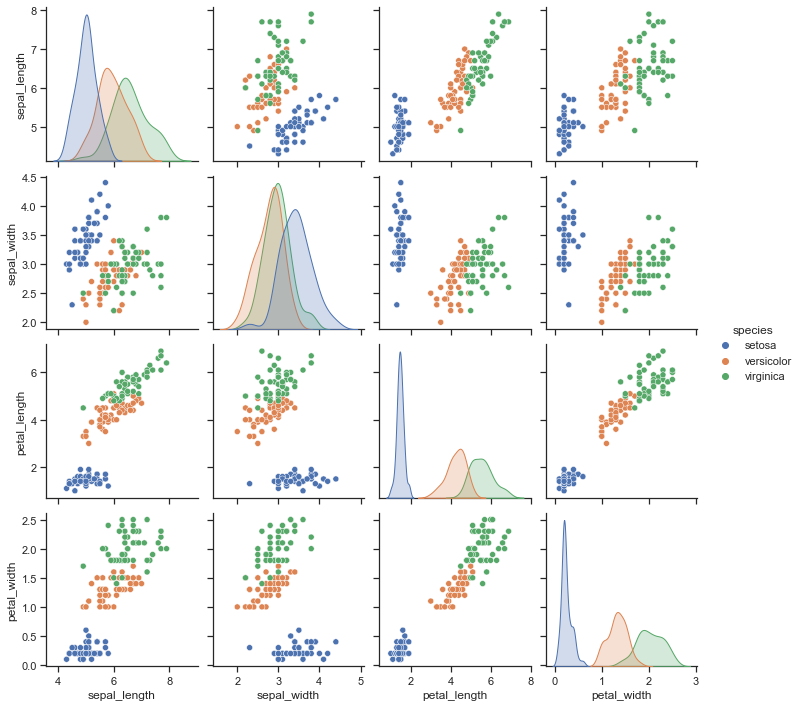

In [24]:
fig = sns.pairplot(data=iris, hue='species')
plt.show()

Посмотрим различия трех видов цветов друг от друга

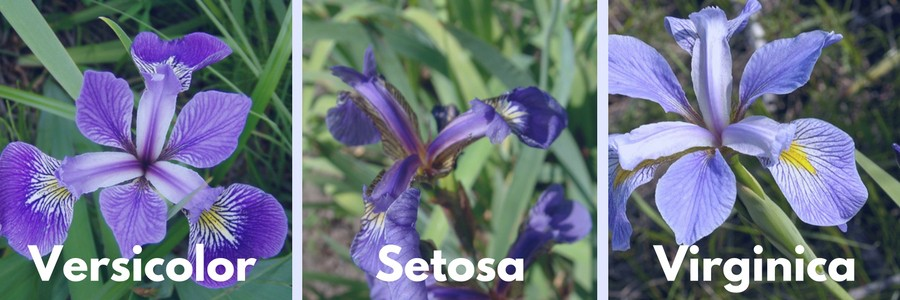

In [25]:
from IPython.display import Image
Image('https://pp.userapi.com/c853524/v853524724/6e4da/vduVoAF89Zg.jpg')

3 типа цветов отличаются размерами цветков и лепестков. 2 из этих цветков похожи между собой.

Матрица корреляций для 4-мерного пространства:

$$
\Sigma = \begin{bmatrix}
    \rho_{1}^2  \quad \rho_{1,2} \quad \rho_{1,3} \quad \rho_{1,4} \\
    \rho_{2,1}  \quad \rho_{2}^2 \quad \rho_{2,3} \quad \sigma_{2,4} \\
    \rho_{3,1}  \quad \rho_{3,2} \quad \rho_{3}^2 \quad \rho_{4,3} \\
    \rho_{4,1}  \quad \rho_{4,2} \quad \rho_{4,3} \quad \rho_{4}^2
\end{bmatrix}
$$


**Критерий Пирсона** также не зависит от нормирования


Корелляция Пирсона:
$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$
Измеряет линейную зависимость между величинами, предполагая, что выборки составляют нормальное распределение

Матрица корреляций - это нормированная матрица корреляций.

Создадим таблицу X из таблицы о цветах ириса: выбираем первые четыре колонки (команда .iloc[:,:4])

In [26]:
X = iris.iloc[:,:4]

In [27]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Для подсчета **матрицы корреляций** можно использовать метод corr, который нормализует значения.

In [28]:
np.round_(X.corr(), decimals=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


2-ой способ подсчета матрицы корреляций:

In [29]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


**Но!** Корреляция не всегда линейна

# Центральная предельная теорема

Сгенерируем равномерное распределение:

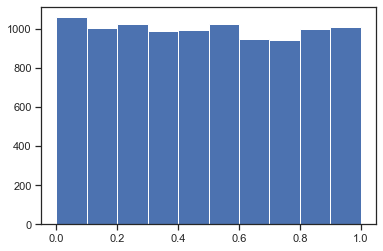

In [30]:
number_of_randoms = 10000
plt.hist(np.random.rand(number_of_randoms))
plt.show()

Данная выборка является равномерной. Сгенерируем 1000 таких выборок. Суммы элементов элементов выборок стремится к нормальному распределению.

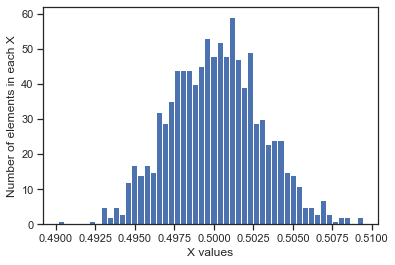

In [31]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(number_of_randoms))/number_of_randoms
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

   Закон больших чисел играет важное значение в теоретическом плане, т.к. он служит обоснованием методов математической статистики. На практике закон больших чисел можно продемонстрировать на примере погоды. Например, **атмосферное давление** каждый день есть величина случайная. Однако ее среднегодовое значение в течении многих лет практически не изменяется. 
